In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
len(df)

7043

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Initial data preparation


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [9]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [11]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df.totalcharges.isnull().sum()

11

In [14]:
df[df.totalcharges.isnull()][['customerid', 'totalcharges']].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
totalcharges,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.totalcharges = df.totalcharges.fillna(0)

In [16]:
df[df.totalcharges.isnull()][['customerid', 'totalcharges']].T

""
customerid
totalcharges


In [17]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [18]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [19]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [20]:
df.churn = (df.churn == 'yes').astype(int)

# 3.3 Setting up the validation framework

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_test_split?

In [23]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
len(df_train_full), len(df_test)

(5634, 1409)

In [25]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [26]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [27]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5323,1448-cywkc,female,0,yes,yes,58,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.20,6225.40,0
3026,6127-isgtu,female,0,yes,no,16,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,84.95,1378.25,1
1860,3279-dyzqm,male,0,yes,yes,71,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.45,1378.45,0
5251,8485-gjcdn,female,1,no,no,5,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,69.05,318.50,1
2642,2195-zrvax,female,0,yes,no,47,yes,no,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,85.30,4045.65,1


In [28]:
df_train.reset_index()

,index,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5323,1448-cywkc,female,0,yes,yes,58,yes,yes,fiber_optic,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.20,6225.40,0
1,3026,6127-isgtu,female,0,yes,no,16,yes,yes,fiber_optic,...,no,no,yes,no,month-to-month,yes,electronic_check,84.95,1378.25,1
2,1860,3279-dyzqm,male,0,yes,yes,71,yes,no,no,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.45,1378.45,0
3,5251,8485-gjcdn,female,1,no,no,5,yes,no,fiber_optic,...,no,no,no,no,month-to-month,yes,mailed_check,69.05,318.50,1
4,2642,2195-zrvax,female,0,yes,no,47,yes,no,fiber_optic,...,yes,no,no,yes,month-to-month,yes,electronic_check,85.30,4045.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,3977,4778-izarl,male,0,yes,no,63,yes,no,fiber_optic,...,yes,yes,yes,yes,two_year,yes,credit_card_(automatic),110.10,6705.70,0
4221,6273,4342-hentk,female,1,no,no,2,yes,no,fiber_optic,...,no,no,no,no,month-to-month,yes,electronic_check,70.65,142.35,1
4222,3790,6598-rffvi,male,0,no,no,2,yes,no,no,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,credit_card_(automatic),19.30,28.30,1
4223,5712,8204-tifgj,female,0,no,no,23,yes,no,no,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,bank_transfer_(automatic),20.30,470.60,0


In [29]:
df_train.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1448-cywkc,female,0,yes,yes,58,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.20,6225.40,0
1,6127-isgtu,female,0,yes,no,16,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,84.95,1378.25,1
2,3279-dyzqm,male,0,yes,yes,71,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.45,1378.45,0
3,8485-gjcdn,female,1,no,no,5,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,69.05,318.50,1
4,2195-zrvax,female,0,yes,no,47,yes,no,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,85.30,4045.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,4778-izarl,male,0,yes,no,63,yes,no,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,credit_card_(automatic),110.10,6705.70,0
4221,4342-hentk,female,1,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.65,142.35,1
4222,6598-rffvi,male,0,no,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,credit_card_(automatic),19.30,28.30,1
4223,8204-tifgj,female,0,no,no,23,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,bank_transfer_(automatic),20.30,470.60,0


In [30]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [31]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [32]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 Exploratory data analysis
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [33]:
df_train_full = df_train_full.reset_index(drop=True)

In [34]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [35]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [36]:
df_train_full.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [37]:
global_churn_rate = df_train_full.churn.mean()
round(global_churn_rate, 2)

0.27

In [38]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [39]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [40]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [41]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio
Feature importan analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information


In [42]:
churn_female = df_train_full[df_train_full.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [43]:
churn_male = df_train_full[df_train_full.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [44]:
df_train_full.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [45]:
churn_partner = df_train_full[df_train_full.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [46]:
churn_no_partner = df_train_full[df_train_full.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [47]:
global_churn_rate - churn_partner

0.06493474245795922

In [48]:
global_churn_rate - churn_male

0.006754520462819769

In [49]:
global_churn_rate - churn_female

-0.006855983216553063

In [50]:
churn_no_partner / global_churn_rate

1.2216593879412643

In [51]:
churn_partner / global_churn_rate

0.7594724924338315

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn_rate as diff,
    AVG(churn) / global_churn_rate as risk
FROM
    data
GROUP BY
    gender;
```

In [52]:
df_train_full.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [53]:
df_train_full.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [54]:
df_group = df_train_full.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['ratio'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [55]:
from IPython.display import display

In [56]:
for col in categorical:
    df_group = df_train_full.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['ratio'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature importance: Mutual information
Mutual information - concept from information theory, 
it tells us how much we can learn about one variable if we know the value of another
- https://en.wikipedia.org/wiki/Mutual_information

In [57]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_train_full.churn, df_train_full.contract)

0.0983203874041556

In [58]:
mutual_info_score(df_train_full.contract, df_train_full.churn)

0.0983203874041556

In [59]:
mutual_info_score(df_train_full.gender, df_train_full.churn)

0.0001174846211139946

In [60]:
mutual_info_score(df_train_full.partner, df_train_full.churn)

0.009967689095399745

In [61]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train_full.churn)

In [62]:
mi = df_train_full[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [63]:
df_mi = mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


# 3.7 Feature importance: Correlation
How about numerical columns?
- Correlation coefficient

In [64]:
df_train_full.tenure.max()

72

In [65]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [66]:
df_train_full[df_train_full.tenure <= 2].churn.mean()

0.5953420669577875

In [67]:
df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <= 12)].churn.mean()

0.3994413407821229

In [68]:
df_train_full[(df_train_full.tenure > 12)].churn.mean()

0.17634908339788277

In [69]:
df_train_full[df_train_full.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [70]:
df_train_full[(df_train_full.monthlycharges > 50)].churn.mean()

0.32499341585462205

# 3.8 One-hot encoding
- Use Scikit-Learn to encode categorical features

In [71]:
from sklearn.feature_extraction import DictVectorizer

In [72]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,one_year
1,female,month-to-month
2,male,two_year
3,female,month-to-month
4,female,month-to-month
5,female,one_year
6,female,one_year
7,male,one_year
8,male,one_year
9,female,month-to-month


In [73]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'female',
  2: 'male',
  3: 'female',
  4: 'female',
  5: 'female',
  6: 'female',
  7: 'male',
  8: 'male',
  9: 'female'},
 'contract': {0: 'one_year',
  1: 'month-to-month',
  2: 'two_year',
  3: 'month-to-month',
  4: 'month-to-month',
  5: 'one_year',
  6: 'one_year',
  7: 'one_year',
  8: 'one_year',
  9: 'month-to-month'}}

In [74]:
dicts = df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [75]:
dv = DictVectorizer()
dv.fit(dicts)

DictVectorizer()

In [76]:
dv.transform(dicts)

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [77]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [78]:
dv.transform(dicts)

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [145]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [80]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [81]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 58,
 'monthlycharges': 105.2,
 'totalcharges': 6225.4}

In [82]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [146]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [84]:
dv.transform(train_dict[:5])[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0520e+02, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 5.8000e+01, 6.2254e+03])

In [85]:
list(dv.transform(train_dict[:5])[0])

[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 105.2,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 58.0,
 6225.4]

In [86]:
X_train = dv.fit_transform(train_dict)

In [87]:
X_train.shape

(4225, 45)

In [88]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [89]:
X_val = dv.transform(val_dicts)

# 3.9 Logistic regression
- Binary classification
- Linear vs logistic regression

In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [91]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [93]:
sigmoid(z)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

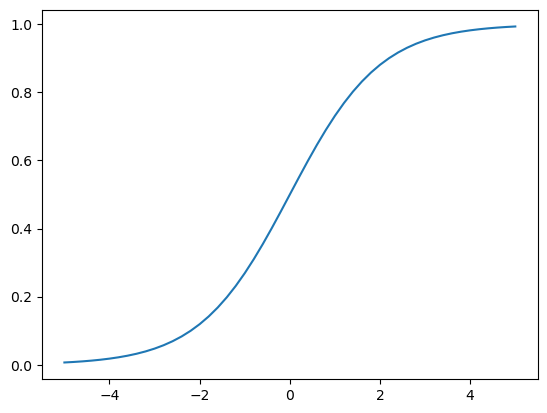

In [94]:
plt.plot(z, sigmoid(z))

In [96]:
def llinear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result

# 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [100]:
model.coef_

array([[ 5.73414918e-01, -1.66493614e-01, -5.37858615e-01,
        -1.64812008e-02, -1.14456110e-01,  7.60206500e-02,
        -1.13795745e-01, -9.31622151e-02, -2.60001960e-02,
        -1.04937114e-01, -3.52685269e-01,  3.35543704e-01,
        -1.13795745e-01,  1.27731025e-03, -1.70888391e-01,
         1.11627527e-01, -7.16764458e-02,  1.19799434e-01,
        -1.13795745e-01, -1.36940999e-01,  2.62636324e-01,
        -1.13795745e-01, -2.79777889e-01, -2.06672621e-01,
         7.57353110e-02, -1.06697688e-01, -2.42396222e-02,
        -5.55206568e-02, -1.16118566e-01,  2.07579198e-01,
        -1.66877286e-01,  1.11627527e-01, -2.42564837e-01,
         2.50557620e-01, -9.85149996e-02, -1.13795745e-01,
         8.13734346e-02, -9.41890015e-02, -1.13795745e-01,
         7.70474365e-02,  2.03337259e-01, -1.13795745e-01,
        -2.20478824e-01, -6.45383914e-02,  3.86141654e-04]])

In [103]:
model.coef_[0].round(3) # weights

array([ 0.573, -0.166, -0.538, -0.016, -0.114,  0.076, -0.114, -0.093,
       -0.026, -0.105, -0.353,  0.336, -0.114,  0.001, -0.171,  0.112,
       -0.072,  0.12 , -0.114, -0.137,  0.263, -0.114, -0.28 , -0.207,
        0.076, -0.107, -0.024, -0.056, -0.116,  0.208, -0.167,  0.112,
       -0.243,  0.251, -0.099, -0.114,  0.081, -0.094, -0.114,  0.077,
        0.203, -0.114, -0.22 , -0.065,  0.   ])

In [104]:
model.intercept_

array([-0.13093731])

In [105]:
model.intercept_[0].round(3)

-0.131

In [107]:
model.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0])

In [108]:
model.predict_proba(X_train)

array([[0.78446588, 0.21553412],
       [0.28316973, 0.71683027],
       [0.99853013, 0.00146987],
       ...,
       [0.89584231, 0.10415769],
       [0.8978211 , 0.1021789 ],
       [0.89476407, 0.10523593]])

In [111]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.23200149, 0.24773658, 0.27713277, ..., 0.00226803, 0.12257788,
       0.00144122])

In [114]:
churn_decision = (y_pred >=0.5)
churn_decision

array([False, False, False, ..., False, False, False])

In [115]:
df_val[churn_decision].customerid

10      6551-gnydg
16      0689-nkylf
18      3398-fshon
19      4704-eryfc
26      8258-gstjk
           ...    
1387    1965-ddbwu
1388    2694-ciumo
1389    9389-acwbi
1393    8837-vvwlq
1405    4273-mbhya
Name: customerid, Length: 337, dtype: object

In [116]:
y_val

array([0, 1, 0, ..., 0, 0, 0])

In [117]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
y_val == churn_decision

array([ True, False,  True, ...,  True,  True,  True])

In [119]:
(y_val == churn_decision).mean()

0.7991483321504613

In [125]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [126]:
df_pred

,probability,prediction,actual,correct
0,0.232001,0,0,True
1,0.247737,0,1,False
2,0.277133,0,0,True
3,0.355824,0,1,False
4,0.053981,0,0,True
...,...,...,...,...
1404,0.028544,0,0,True
1405,0.786681,1,0,False
1406,0.002268,0,0,True
1407,0.122578,0,0,True


In [127]:
df_pred.correct.mean()

0.7991483321504613

In [128]:
df_pred.correct.astype('int').mean()

0.7991483321504613

# 3.11 Model intepretation
- Look at the coefficients
- Train a smaller model with fewer features

In [130]:
a = [1, 2, 3, 4]
b = 'abcd'

In [132]:
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [133]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [144]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.573,
 'contract=one_year': -0.166,
 'contract=two_year': -0.538,
 'dependents=no': -0.016,
 'dependents=yes': -0.114,
 'deviceprotection=no': 0.076,
 'deviceprotection=no_internet_service': -0.114,
 'deviceprotection=yes': -0.093,
 'gender=female': -0.026,
 'gender=male': -0.105,
 'internetservice=dsl': -0.353,
 'internetservice=fiber_optic': 0.336,
 'internetservice=no': -0.114,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.171,
 'multiplelines=no_phone_service': 0.112,
 'multiplelines=yes': -0.072,
 'onlinebackup=no': 0.12,
 'onlinebackup=no_internet_service': -0.114,
 'onlinebackup=yes': -0.137,
 'onlinesecurity=no': 0.263,
 'onlinesecurity=no_internet_service': -0.114,
 'onlinesecurity=yes': -0.28,
 'paperlessbilling=no': -0.207,
 'paperlessbilling=yes': 0.076,
 'partner=no': -0.107,
 'partner=yes': -0.024,
 'paymentmethod=bank_transfer_(automatic)': -0.056,
 'paymentmethod=credit_card_(automatic)': -0.116,
 'paymentmethod=electronic_check': 0.208,

In [135]:
small = ['contract', 'tenure', 'monthlycharges']

In [138]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'one_year', 'tenure': 58, 'monthlycharges': 105.2},
 {'contract': 'month-to-month', 'tenure': 16, 'monthlycharges': 84.95},
 {'contract': 'two_year', 'tenure': 71, 'monthlycharges': 19.45},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 69.05},
 {'contract': 'month-to-month', 'tenure': 47, 'monthlycharges': 85.3},
 {'contract': 'one_year', 'tenure': 62, 'monthlycharges': 54.75},
 {'contract': 'one_year', 'tenure': 36, 'monthlycharges': 54.45},
 {'contract': 'one_year', 'tenure': 18, 'monthlycharges': 89.6},
 {'contract': 'one_year', 'tenure': 30, 'monthlycharges': 25.35},
 {'contract': 'month-to-month', 'tenure': 40, 'monthlycharges': 50.85}]

In [140]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [141]:
dv_small = DictVectorizer(sparse=False)


In [142]:
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [143]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [147]:
X_train_small = dv_small.transform(dicts_train_small)

In [148]:
model_small = LogisticRegression()

In [150]:
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [153]:
w0 = model_small.intercept_[0]
w0

-2.612827993890611

In [156]:
w = model_small.coef_[0]
w.round(3)

array([ 1.055, -0.008, -1.047,  0.029, -0.036])

In [157]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 1.055,
 'contract=one_year': -0.008,
 'contract=two_year': -1.047,
 'monthlycharges': 0.029,
 'tenure': -0.036}

# 3.11 Using the model


In [159]:
dicts_full_train = df_train_full[categorical + numerical].to_dict(orient='records')

In [161]:
dicts_full_train[:1]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35}]

In [167]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [168]:
y_full_train = df_train_full.churn.values

In [169]:
model = LogisticRegression().fit(X_full_train, y_full_train)

In [178]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [179]:
X_test = dv.transform(dicts_test)

In [180]:
y_pred = model.predict_proba(X_test)[:, 1]

In [181]:
churn_decision = (y_pred >= 0.5)

In [182]:
(churn_decision == y_test).mean()

0.815471965933286

In [184]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [188]:
X_small = dv.transform([customer])

In [189]:
X_small.shape

(1, 45)

In [190]:
model.predict_proba(X_small)[0, 1]

0.40568109779496697

In [191]:
y_test[10]

0